# Tutorial 4:Mouse_Olfactory(Stero-seq & Slide-seqV2)

## Environment Configuration & Package Loading

In [1]:
import os
import torch
import scanpy as sc
from GenOT import genot


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# the location of R, which is necessary for mclust algorithm. Please replace the path below with local R installation path
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.4.1'
os.environ['PATH'] = 'C:/Program Files/R/R-4.4.1/bin/x64;' + os.environ['PATH']

## Data Loading

In [2]:
# read data
adata1 = sc.read_h5ad(r"..\Data\Stereo-seq_MoB.h5ad")
adata1 = sc.pp.subsample(adata1, n_obs=10000, random_state=0, copy=True)
adata2 = sc.read_h5ad(r"..\Data\Slide-seqV2.h5ad")
adata2 = sc.pp.subsample(adata2, n_obs=10000, random_state=0, copy=True)


In [3]:
adata1

AnnData object with n_obs × n_vars = 10000 × 27106
    obsm: 'spatial'

## Run GenOT

In [4]:
# define model
encoder1 = genot.Encoder(adata1, epochs=1000,device=device, )
encoder2 = genot.Encoder(adata2, epochs=1000,device=device, )
# run model
adata1 = encoder1.train_encoder()
adata2 = encoder2.train_encoder()

Begin to train ...


100%|██████████| 1000/1000 [00:17<00:00, 58.28it/s]


 finished!
Begin to train ...


100%|██████████| 1000/1000 [00:17<00:00, 58.77it/s]

 finished!


## Spatial Domain Identification (mclust)

In [5]:
# clustering
from GenOT.utils import clustering

tool = 'mclust'
n_clusters1 = 16
n_clusters2 = 15
# clustering
clustering(adata1, n_clusters1, method=tool)
clustering(adata2, n_clusters2, method=tool)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%


## Visualization

[<AxesSubplot: title={'center': 'Mouse_Olfactory(Stero-seq)'}, xlabel='spatial1', ylabel='spatial2'>]

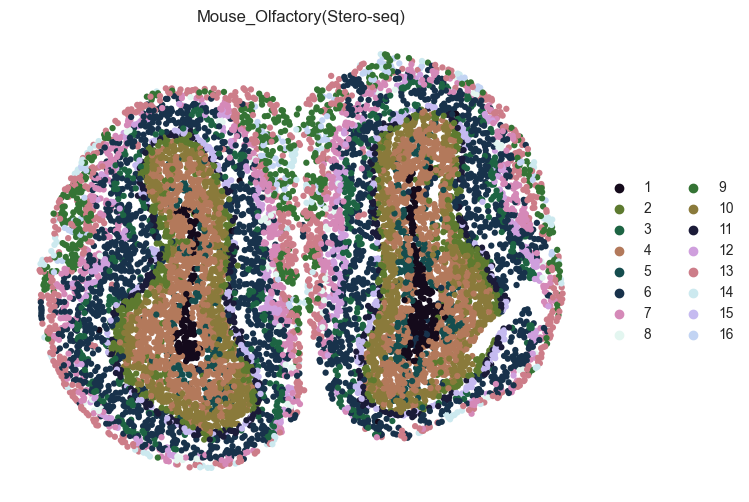

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


rgb_values = sns.color_palette("cubehelix", len(adata1.obs['domain'].unique()))
color_fine = dict(zip(list(adata1.obs['domain'].unique()), rgb_values))

plt.rcParams["figure.figsize"] = (12, 6)

sc.pl.spatial(
    adata1, img_key=None, color='domain', title="Mouse_Olfactory(Stero-seq)",
    show=False, frameon=False, spot_size=70, palette=color_fine
)


[<AxesSubplot: title={'center': 'Mouse_Olfactory(Slide-seqV2)'}, xlabel='spatial1', ylabel='spatial2'>]

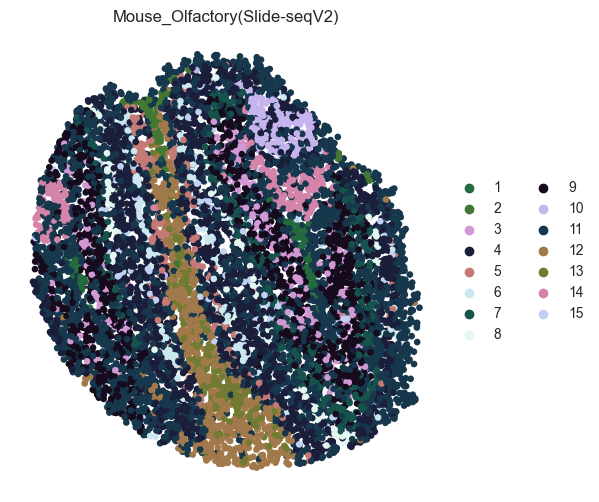

In [7]:
rgb_values = sns.color_palette("cubehelix", len(adata2.obs['domain'].unique()))
color_fine = dict(zip(list(adata2.obs['domain'].unique()), rgb_values))

plt.rcParams["figure.figsize"] = (12, 6)
sc.pl.spatial(
    adata2, img_key=None, color='domain', title="Mouse_Olfactory(Slide-seqV2)",
    show=False, frameon=False, spot_size=70, palette=color_fine
)